<a href="https://colab.research.google.com/github/iostolaza/Yolo-Model-Training/blob/main/Yolo9modelPretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ultralytics Yolo Model Deployment

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 35851, done.
remote: Counting objects: 100% (4428/4428), done.
remote: Compressing objects: 100% (1970/1970), done.
remote: Total 35851 (delta 3062), reused 3631 (delta 2439), pack-reused 31423
Receiving objects: 100% (35851/35851), 29.87 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (25821/25821), done.


In [ ]:
!pip install ultralytics


Training a New Model from Scratch (.yaml file)

In [ ]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch using the architecture defined in the .yaml file
model = YOLO("/content/ultralytics/ultralytics/cfg/models/v9/yolov9c.yaml")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)


Using the Pre-trained Model (.pt file)


image 1/1 /content/ultralytics/ultralytics/assets/zidane.jpg: 384x640 2 persons, 2 ties, 1404.6ms
Speed: 3.2ms preprocess, 1404.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


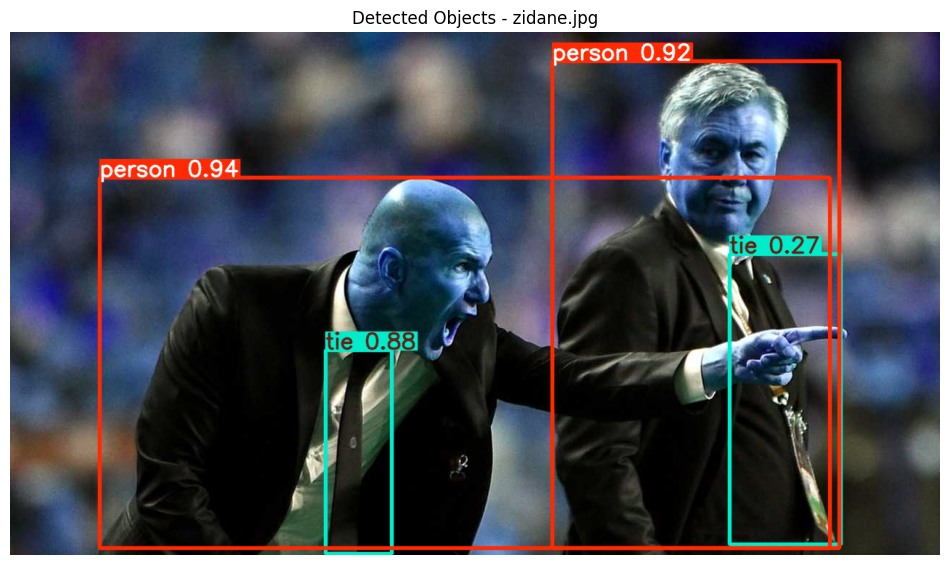


image 1/1 /content/ultralytics/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 2046.5ms
Speed: 7.4ms preprocess, 2046.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


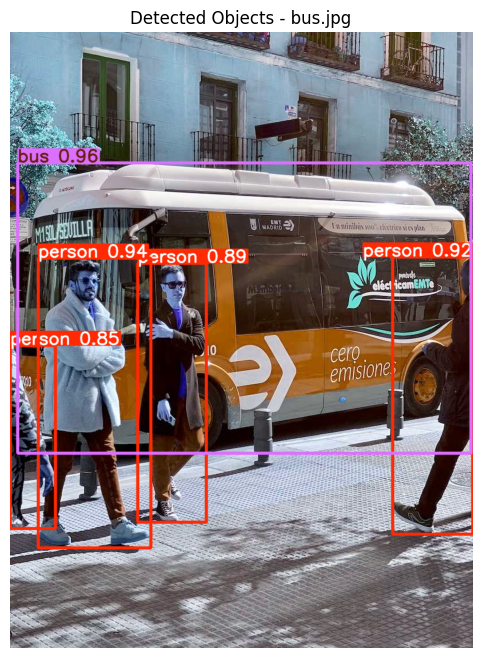

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

def run_inference_on_folder(model_path, folder_path):
    # Load the YOLOv9c model from pre-trained weights
    model = YOLO(model_path)

    # Iterate over all image files in the specified folder and run inference
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(folder_path, filename)
            results = model(image_path)

            # Retrieve the annotated image as a NumPy array
            annotated_frame = results[0].plot()

            # Display the image using matplotlib
            plt.figure(figsize=(12, 8))
            plt.imshow(annotated_frame)
            plt.axis('off')
            plt.title(f'Detected Objects - {filename}')
            plt.show()

if __name__ == "__main__":
    model_path = "/content/yolov9c.pt"
    folder_path = "/content/ultralytics/ultralytics/assets"

    # Run inference on all images in the specified folder
    run_inference_on_folder(model_path, folder_path)

